# 2022 Store Sales Forecasting Kaggle Competition

### Oil and Holiday Event EDA

Start date: 28/12/2022
Author: James To

In [91]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
# Set data folder path
datafolder = 'C:/Users/James/Documents/Kaggle/Store Sales/data/'

# Read in data
stores_rawdf = pd.read_csv(datafolder + 'stores.csv')
transactions_rawdf = pd.read_csv(datafolder + 'transactions.csv')
train_rawdf = pd.read_csv(datafolder + 'train.csv')
test_rawdf = pd.read_csv(datafolder + 'test.csv')
oil_rawdf = pd.read_csv(datafolder + 'oil.csv')
holidays_events_rawdf = pd.read_csv(datafolder + 'holidays_events.csv')


### Holidays Events EDA

In [93]:
# Investigate holiday events
holidays_events_rawdf.head()
holidays_events_rawdf.describe()

holidays_events_rawdf.groupby("locale_name").count()

,date,type,locale,description,transferred
locale_name,,,,,
Ambato,12,12,12,12,12
Cayambe,6,6,6,6,6
Cotopaxi,6,6,6,6,6
Cuenca,7,7,7,7,7
Ecuador,174,174,174,174,174
El Carmen,6,6,6,6,6
Esmeraldas,6,6,6,6,6
Guaranda,12,12,12,12,12
Guayaquil,11,11,11,11,11


In [94]:
holidays_events_rawdf.groupby("description").count()

,date,type,locale,locale_name,transferred
description,,,,,
Batalla de Pichincha,5,5,5,5,5
Black Friday,3,3,3,3,3
Cantonizacion de Cayambe,6,6,6,6,6
Cantonizacion de El Carmen,6,6,6,6,6
Cantonizacion de Guaranda,6,6,6,6,6
...,...,...,...,...,...
Traslado Fundacion de Quito,1,1,1,1,1
Traslado Independencia de Guayaquil,3,3,3,3,3
Traslado Primer Grito de Independencia,2,2,2,2,2


<AxesSubplot:xlabel='type'>

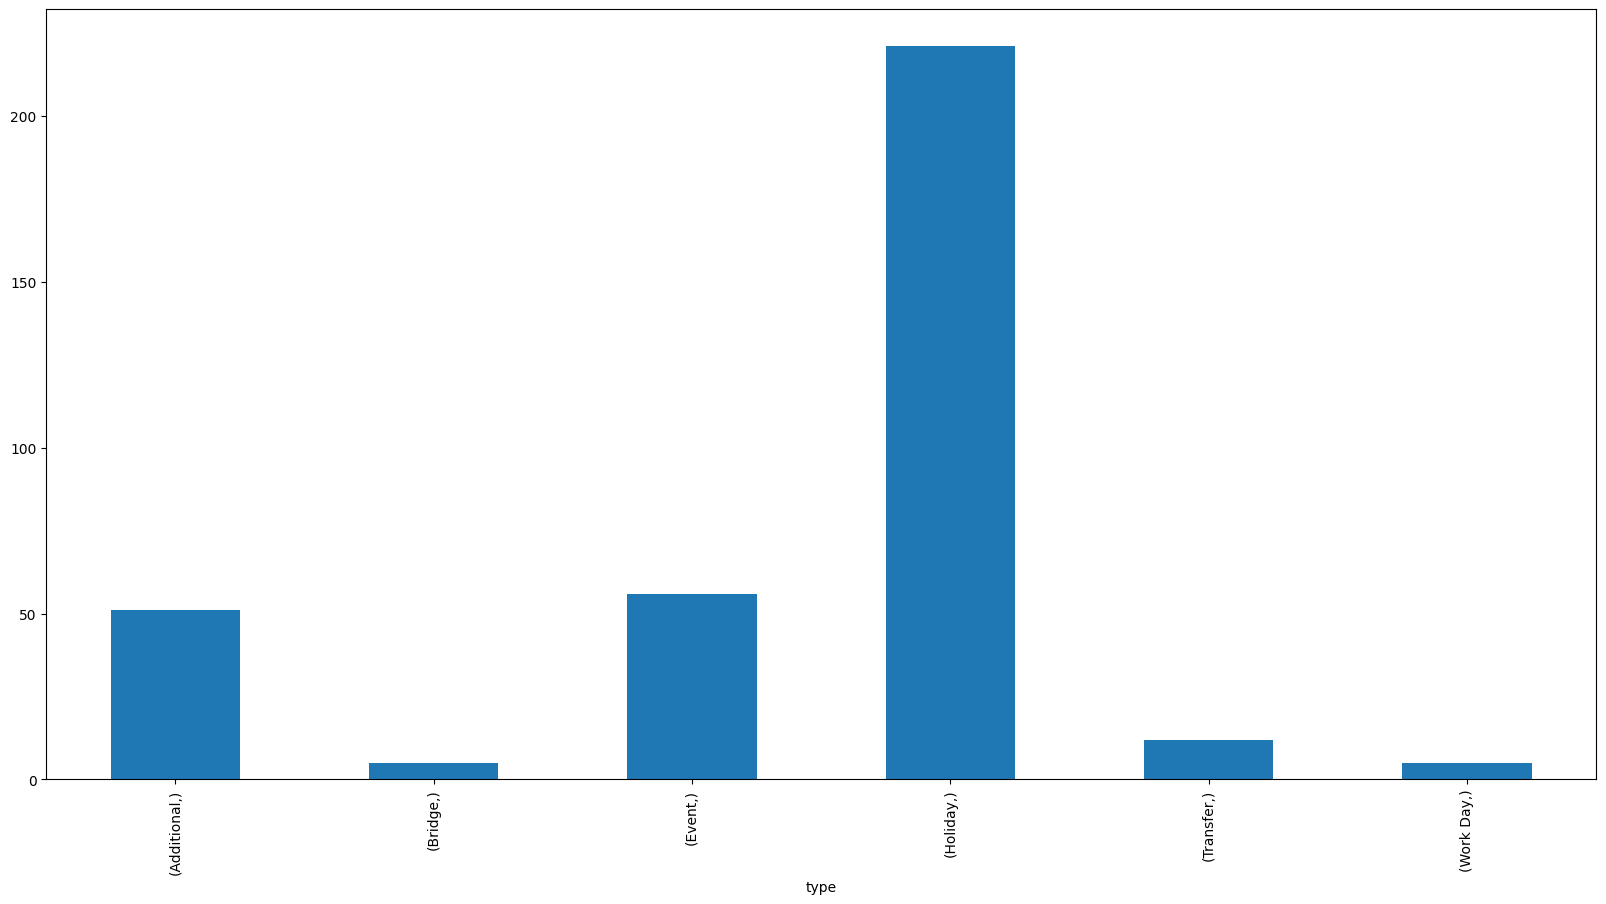

In [112]:
holidays_events_rawdf[['type']].value_counts().sort_index().plot(kind = 'bar', figsize = (20,10))

<AxesSubplot:xlabel='description'>

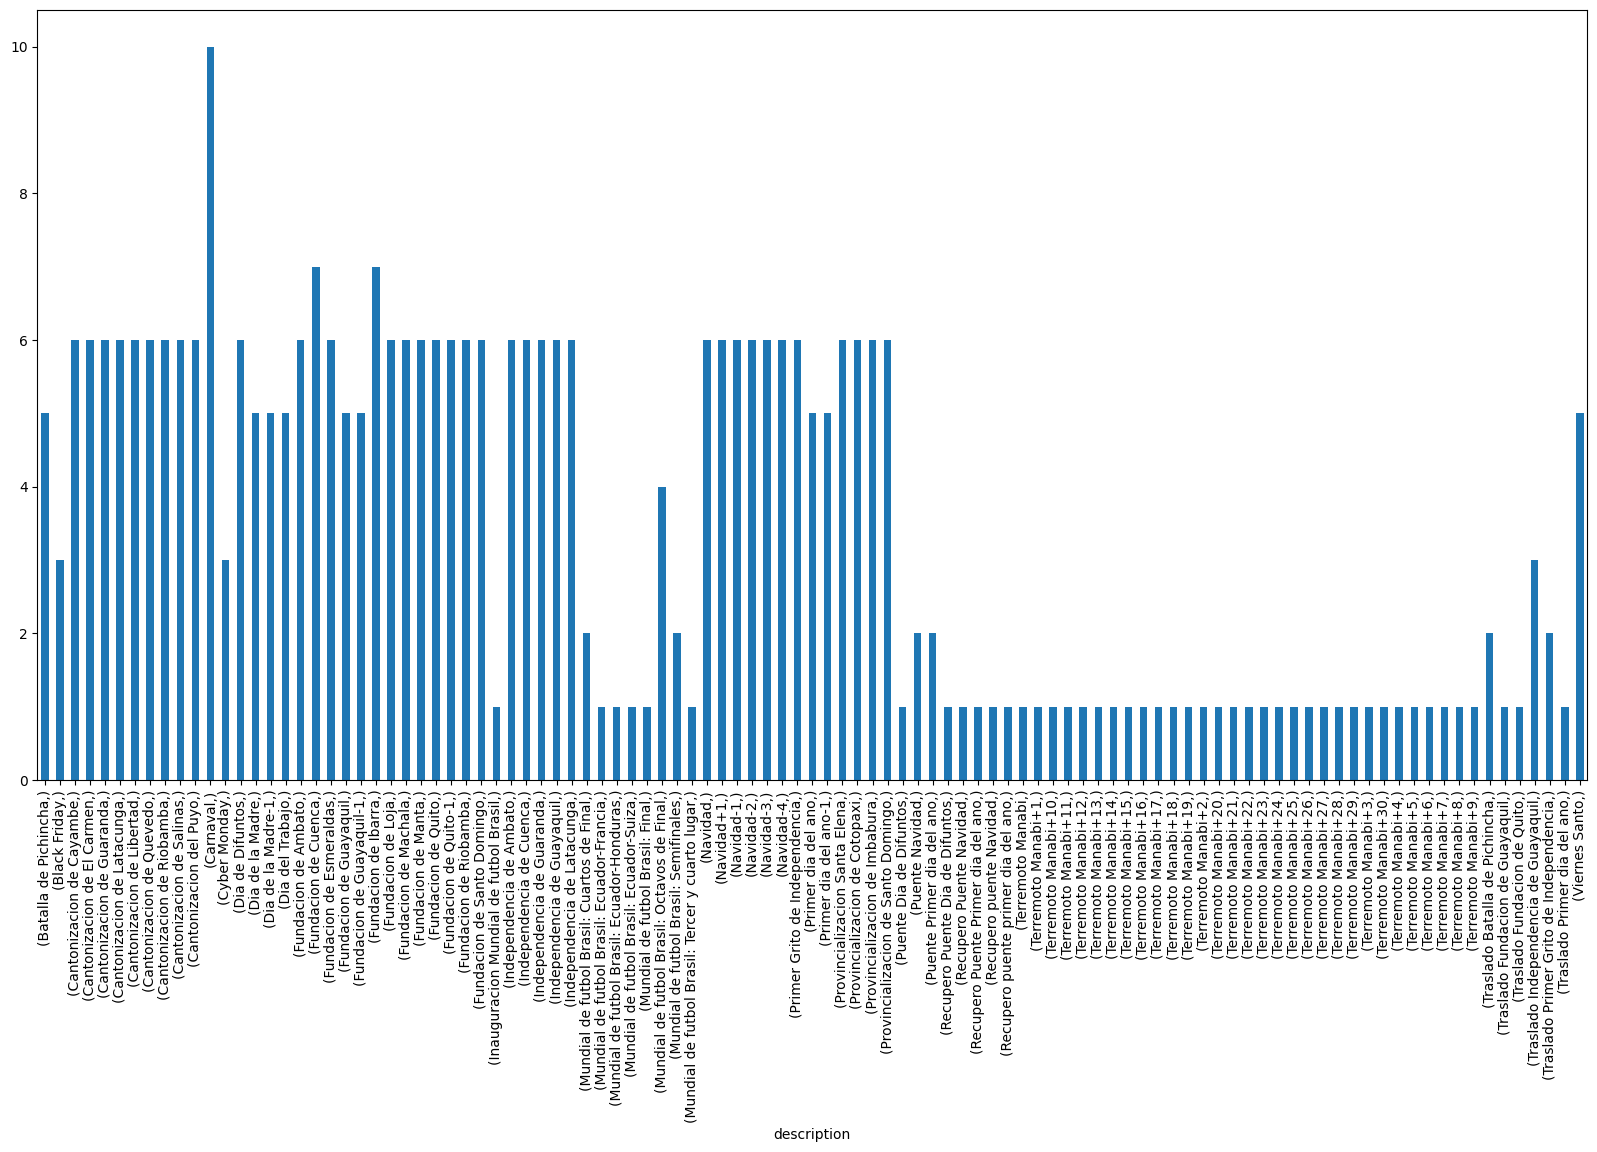

In [111]:
holidays_events_rawdf[['description']].value_counts().sort_index().plot(kind = 'bar', figsize = (20,10))

In [95]:
holidays_events_rawdf["description"].nunique()

103

In [ ]:
# Looking into Navidad
# Christmas
# Clean after merge to make Navidad one value type

In [ ]:
# Looking into Terremoto it is all to do with Eartherquake
# Need to remember to change value to Earthequake

In [96]:
# Duplicates Holidays Events
holidays_events_rawdf.duplicated().sum()

0

In [97]:
# Merging consideration
subset = holidays_events_rawdf['transferred'] == False #Create subset to only join the non-transferred holiday dates
# Don't need to remove transferred holidays because it could still be shown in the data

### Oil

In [98]:
# Investigate Oil
oil_rawdf.describe()

,dcoilwtico
count,1175.000000
mean,67.714366
std,25.630476
min,26.190000
25%,46.405000
50%,53.190000
75%,95.660000
max,110.620000


In [99]:
# Oil head
oil_rawdf.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [100]:
# Duplicates Oil
print(oil_rawdf.duplicated())
oil_rawdf.duplicated().sum()

0       False
1       False
2       False
3       False
4       False
        ...  
1213    False
1214    False
1215    False
1216    False
1217    False
Length: 1218, dtype: bool


0

In [104]:
# Count missing
oil_rawdf.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [109]:
oil_rawdf.dtypes

date           object
dcoilwtico    float64
dtype: object

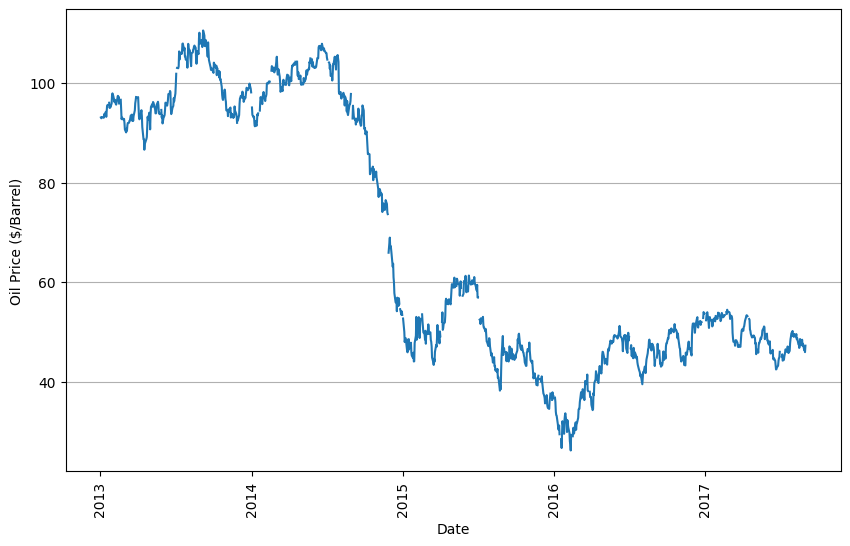

In [110]:
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(oil_rawdf["date"]),oil_rawdf["dcoilwtico"])
plt.grid(axis="y")
plt.xlabel("Date")
plt.ylabel("Oil Price ($/Barrel)")
plt.xticks(rotation=90)
plt.show()

#### Merging Oil and Holiday

In [ ]:
# Merge holidays events and oil
holidays_events_oil = pd.merge(oil_rawdf, holidays_events_rawdf)
holidays_events_oil.head()

,date,dcoilwtico,type,locale,locale_name,description,transferred,count
0,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,1
1,2013-02-11,97.01,Holiday,National,Ecuador,Carnaval,False,1
2,2013-02-12,97.48,Holiday,National,Ecuador,Carnaval,False,1
3,2013-04-01,97.10,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False,1
4,2013-04-12,91.23,Holiday,Local,Cuenca,Fundacion de Cuenca,False,1


In [ ]:
# count
holidays_events_oil.count()

date           202
dcoilwtico     182
type           202
locale         202
locale_name    202
description    202
transferred    202
count          202
dtype: int64

In [ ]:
# NAs
holidays_events_oil[holidays_events_oil['dcoilwtico'].isna()]


,date,dcoilwtico,type,locale,locale_name,description,transferred,count
0,2013-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,1
29,2013-12-25,NaN,Holiday,National,Ecuador,Navidad,False,1
32,2014-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,1
37,2014-04-18,NaN,Holiday,National,Ecuador,Viernes Santo,False,1
52,2014-07-04,NaN,Event,National,Ecuador,Mundial de futbol Brasil: Cuartos de Final,False,1
77,2014-12-25,NaN,Holiday,National,Ecuador,Navidad,False,1
81,2015-01-01,NaN,Holiday,National,Ecuador,Primer dia del ano,False,1
83,2015-02-16,NaN,Holiday,National,Ecuador,Carnaval,False,1
87,2015-04-03,NaN,Holiday,National,Ecuador,Viernes Santo,False,1
96,2015-07-03,NaN,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,1


In [ ]:
holidays_events_oil[holidays_events_oil['dcoilwtico'].isna()].count()


date           20
dcoilwtico      0
type           20
locale         20
locale_name    20
description    20
transferred    20
count          20
dtype: int64